In [38]:
%load_ext autoreload
%autoreload 2

import logging

logging.basicConfig(level=logging.WARNING)
logging.getLogger('anonymigraph').setLevel(logging.INFO)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
from notebook_utils import get_ring_of_rings
G, pos= get_ring_of_rings(n_rings=6, nodes_per_ring=5, r_ring=3, r_graph=10)

In [40]:
import kmeans1d
import networkx as nx

from anonymigraph.anonymization.method_variant_nest_model import VariantNestModelAnonymizer

k = 3 # 3 colors
anonymizer = VariantNestModelAnonymizer(k, r=10, parallel=False)
Ga = anonymizer.anonymize(G, random_seed=44)

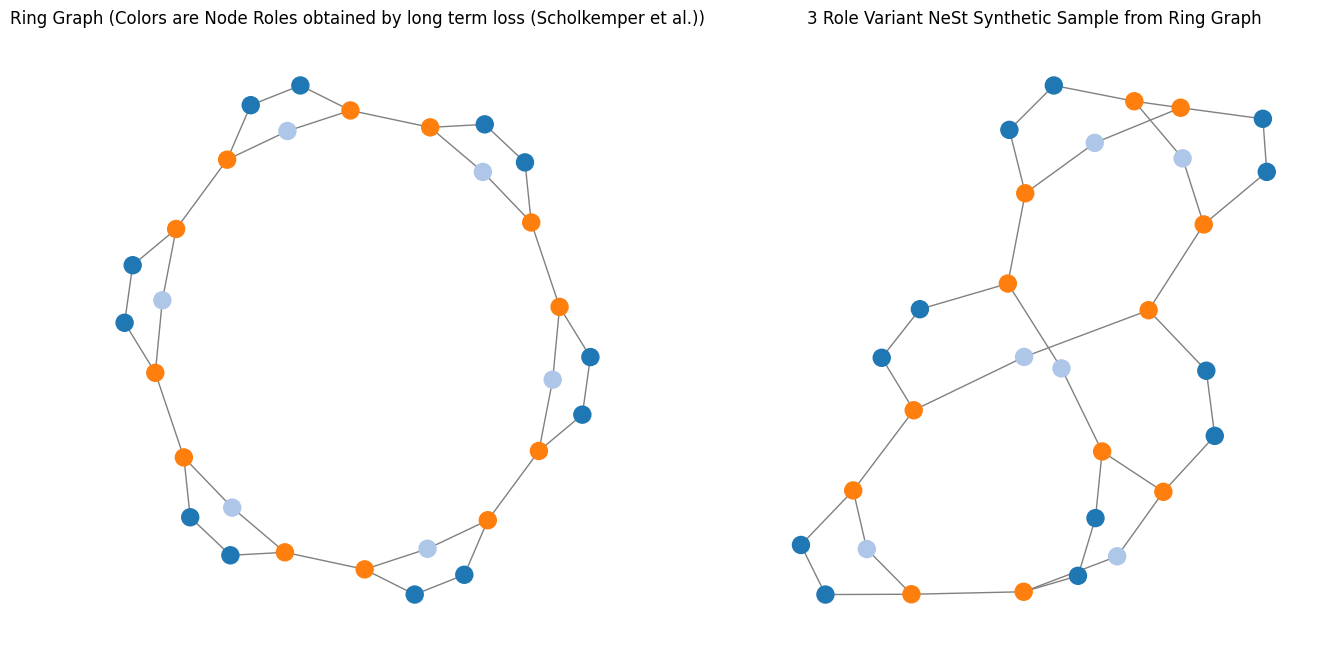

In [41]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import networkx as nx
from anonymigraph.anonymization._external.nest_model.fast_wl import WL_fast

colors = anonymizer._get_node_roles(G)
color_map = matplotlib.colormaps.get_cmap('tab20')
assert len(np.unique(colors)) < 20, "Colormap tab20 only supports 20 distinct colors, please use another colormap if you have more wl colors!"
node_colors = [color_map(cls%19) for cls in colors]

plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
nx.draw(G, nx.spring_layout(G, iterations=2000), with_labels=False, node_color=node_colors, node_size=150, edge_color='gray')
plt.title("Ring Graph (Colors are Node Roles obtained by long term loss (Scholkemper et al.))")

plt.subplot(1, 2, 2)
nx.draw(Ga, nx.spring_layout(Ga, iterations=2000), with_labels=False, node_color=node_colors, node_size=150, edge_color='gray')
plt.title(f"{k} Role Variant NeSt Synthetic Sample from Ring Graph")

plt.show()